### Feature Engineering and Feature Selection

In [1]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
order = pd.read_csv('~/Data_mining/DataArchives/olist_order_items_dataset.csv') #orders order id PK

In [3]:
order.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [4]:
d_set = order
d_set.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [5]:
d_set = d_set.sort_values('shipping_limit_date')
d_set.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
101394,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
84389,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83


In [6]:
d_set = d_set[['shipping_limit_date', 'price', 'freight_value']]
d_set.head(2)

,shipping_limit_date,price,freight_value
101394,2016-09-19 00:15:34,59.50,15.56
84389,2016-09-19 23:11:33,44.99,2.83


In [7]:
d_set.dtypes

shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [8]:
d_set['shipping_limit_date'] = pd.to_datetime(d_set['shipping_limit_date'])
d_set.dtypes

shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [9]:
#https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
d_set.set_index('shipping_limit_date', inplace=True)
d_set = d_set.resample("D").sum()

In [10]:
d_set

,price,freight_value
shipping_limit_date,,
2016-09-19,194.47,24.05
2016-09-20,0.00,0.00
2016-09-21,0.00,0.00
2016-09-22,0.00,0.00
2016-09-23,0.00,0.00
...,...,...
2020-04-05,0.00,0.00
2020-04-06,0.00,0.00
2020-04-07,0.00,0.00


> We can observe there are many Outliers, so assuming the months with no sales to be Outliers we remove them

In [11]:
d_set.shape

(1299, 2)

In [12]:
#https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
d_set = d_set.drop(d_set[d_set['price'] == 0.00].index, axis= 0)

In [13]:
d_set

,price,freight_value
shipping_limit_date,,
2016-09-19,194.47,24.05
2016-10-08,908.29,194.09
2016-10-09,1545.57,243.37
2016-10-10,7607.91,1323.12
2016-10-11,7350.06,1043.57
...,...,...
2018-09-14,619.99,48.43
2018-09-18,999.99,24.77
2020-02-03,75.99,14.70


In [14]:
d_set.rename(columns= {'price': 'Total sales'}, inplace= True)
d_set.index.names = ['Daily Shipping']

In [15]:
d_set.head(2)

,Total sales,freight_value
Daily Shipping,,
2016-09-19,194.47,24.05
2016-10-08,908.29,194.09


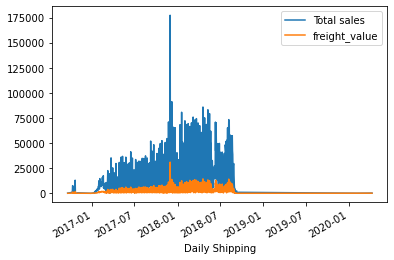

In [16]:
d_set.plot()

In [17]:
# Testing whether the data is Stationary or not
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result= adfuller(d_set['Total sales'])

In [19]:
#https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/blob/master/Untitled.ipynb
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(d_set['Total sales'])

ADF Test Statistic : -2.4295615100445858
p-value : 0.13356610631939436
#Lags Used : 18
Number of Observations Used : 536
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


> Data looks like Stationary, but our test says data is non-stationary based on p-value

### Differencing (Making the data Stationary)

In [21]:
d_set['Seasonal First Difference'] = d_set['Total sales'] - d_set['Total sales'].shift(1)

In [22]:
d_set

,Total sales,freight_value,Seasonal First Difference
Daily Shipping,,,
2016-09-19,194.47,24.05,NaN
2016-10-08,908.29,194.09,713.82
2016-10-09,1545.57,243.37,637.28
2016-10-10,7607.91,1323.12,6062.34
2016-10-11,7350.06,1043.57,-257.85
...,...,...,...
2018-09-14,619.99,48.43,320.99
2018-09-18,999.99,24.77,380.00
2020-02-03,75.99,14.70,-924.00


In [23]:
## Again test dickey fuller test
adfuller_test(d_set['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.081975419864229
p-value : 1.4532141790120051e-12
#Lags Used : 17
Number of Observations Used : 536
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


> p-value reduced significantly, Hence our data is stationary now

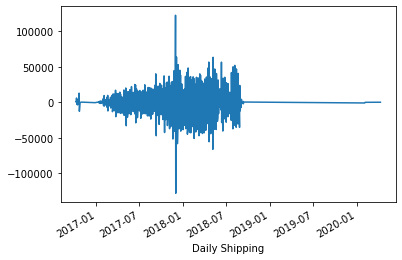

In [24]:
d_set['Seasonal First Difference'].plot()

In [25]:
X = d_set.dropna().drop(['Total sales'], axis= 1)
y = d_set.dropna().drop(['freight_value', 'Seasonal First Difference'], axis= 1)

In [26]:
X.head(2)

,freight_value,Seasonal First Difference
Daily Shipping,,
2016-10-08,194.09,713.82
2016-10-09,243.37,637.28


In [27]:
y.head(2)

,Total sales
Daily Shipping,
2016-10-08,908.29
2016-10-09,1545.57


In [28]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)
X = pd.DataFrame(X)

In [29]:
X #Data is into the same scales

,0,1
0,-1.121205,0.032655
1,-1.106930,0.029153
2,-0.794163,0.277335
3,-0.875139,-0.011796
4,-1.002401,-0.100175
...,...,...
549,-1.163397,0.014684
550,-1.170251,0.017383
551,-1.173168,-0.042271
552,-1.173179,-0.000275


In [30]:
#https://www.kaggle.com/antoinekrajnc/simplest-time-series-using-linear-regression
def TimeSeriesTrainTestSplit(x, y, test_size):
    
        test_index = int(len(X)*(1-test_size))
    
        X_train = X.iloc[:test_index]
        y_train = y.iloc[:test_index]
        X_test = X.iloc[test_index:]
        y_test = y.iloc[test_index:]
        return X_train, y_train, X_test, y_test
    
X_train, y_train, X_test, y_test = TimeSeriesTrainTestSplit(X,y, 0.2)

In [31]:
X_train

,0,1
0,-1.121205,0.032655
1,-1.106930,0.029153
2,-0.794163,0.277335
3,-0.875139,-0.011796
4,-1.002401,-0.100175
...,...,...
438,-1.043250,-3.029990
439,2.018450,2.902808
440,0.188510,-1.544430
441,1.330691,1.060468


In [32]:
X_test

,0,1
443,1.142599,-1.447999
444,-0.837984,-1.734518
445,1.633362,2.150113
446,1.344204,-0.472890
447,1.576579,0.362357
...,...,...
549,-1.163397,0.014684
550,-1.170251,0.017383
551,-1.173168,-0.042271
552,-1.173179,-0.000275


## Decission Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
#Just trying DecisionTreeRegressor with Max depth...Overfitting
regressor_1 = DecisionTreeRegressor(criterion='mse') #Just doing till single Leaf node...which gives 100% Accuracy

In [35]:
regressor_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
#Train R-square....Overfitting
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor_1.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


Since we fitted our model to DecisionTreeRegressor with Max depth, without giving depth, it'll do till single Leaf node...which gives 100% Accuracy on TRAIN data

In [37]:
#Test R-square...Overfitting
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor_1.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9395849183899623


> Interestingly TEST data R^2 is not Bad!! even for the Overfitted model

### Cross Validating Overfit model ..5 folds

In [38]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor_1, X, y, cv=5)

In [39]:
score.mean()

0.8602683152936267

### Model Evaluation

In [40]:
prediction = regressor_1.predict(X_test)

In [41]:
type(prediction)

numpy.ndarray

In [42]:
y_test

,Total sales
Daily Shipping,
2018-05-11,51515.69
2018-05-13,13600.43
2018-05-14,60600.31
2018-05-15,50263.29
2018-05-16,58184.16
...,...
2018-09-14,619.99
2018-09-18,999.99
2020-02-03,75.99


/home/rdcosta/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


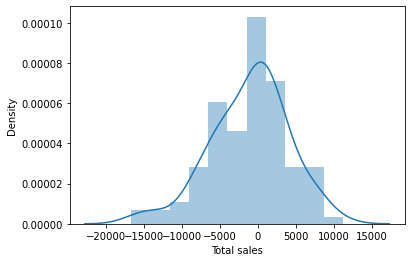

In [43]:
sns.distplot(y_test['Total sales'] -  prediction)

* Bell shape ..so need not to worry much

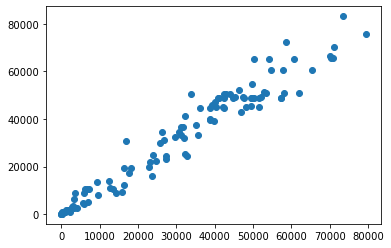

In [44]:
plt.scatter(y_test['Total sales'], prediction)

### Hyperparameter Tuning DEcision Tree Regressor

In [45]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [46]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [47]:
# 10 Fold CV
random_search = GridSearchCV(estimator= regressor_1, param_grid= params, scoring= 'neg_mean_squared_error',
                            n_jobs= -1, cv = 10, verbose= 3)

In [48]:
#Its just a Timer to calculate the timings of each fold run
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [49]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 1 minutes and 26.96 seconds.


In [50]:
#Checking which are the choosen PArametrs from Random Gridsearch
random_search.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 3,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

* We can see it has taken depth of 4

In [51]:
random_search.best_score_

-63355485.39177773

In [52]:
#Predicting based on Hyperparameter Tuning Decision Tree Regressor
prediction_1 = random_search.predict(X_test)

/home/rdcosta/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


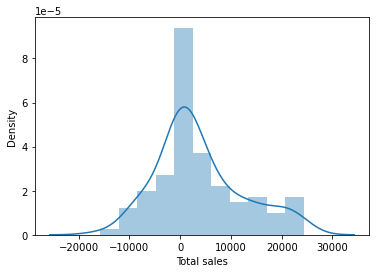

In [53]:
sns.distplot(prediction_1 - y_test['Total sales'])

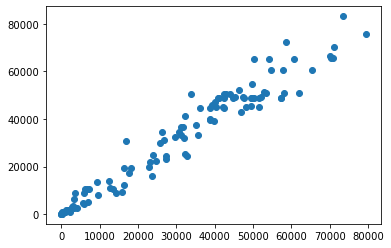

In [54]:
plt.scatter(y_test['Total sales'], prediction)

In [55]:
#Test R-square
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor_1.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9395849183899623


## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are loss functions, because we want to minimize them.

In [56]:
from sklearn import metrics

In [57]:
print('MAE: ', metrics.mean_absolute_error(y_test, prediction_1))
print('MSQ: ', metrics.mean_squared_error(y_test, prediction_1))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction_1)))

MAE:  6518.692617816869
MSQ:  85263213.02260567
RMSE:  9233.808153877017


## Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
#Fit the model to train
regressor_2 = RandomForestRegressor()
regressor_2.fit(X_train, y_train)

/home/rdcosta/miniconda3/envs/dm_w2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [60]:
#Train R-square (LinearRegression().score) gives it
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor_2.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9906265899464133


In [61]:
#Test R-square
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor_2.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.956662728304201


> We can Observe that R-square for a simple RandomForestRegressor has improved too much compared to Decission Tree

In [62]:
X.head(2)

,0,1
0,-1.121205,0.032655
1,-1.106930,0.029153


In [63]:
#Cross validating in 5 folds (cross_val_score: Gives R-square of CV)
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor_2, X, y, cv= 5)

/home/rdcosta/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/rdcosta/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/rdcosta/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/rdcosta/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:593: DataConversionWarni

In [64]:
print('Since we are doing 5-fold Cross Validation, we get 5 different R-square for each fold:', score)

Since we are doing 5-fold Cross Validation, we get 5 different R-square for each fold: [0.87718833 0.89977747 0.80697287 0.97459877 0.95415824]


In [65]:
print('Average R-square value of CV is: {}'.format(score.mean()))

Average R-square value of CV is: 0.902539137141491


### Model Evaluation

In [66]:
prediction_2 = regressor_2.predict(X_test)

/home/rdcosta/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


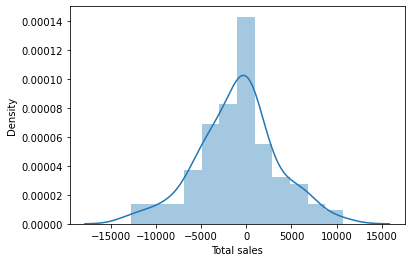

In [67]:
sns.distplot(y_test['Total sales'] - prediction_2) #True value - prediction

/home/rdcosta/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


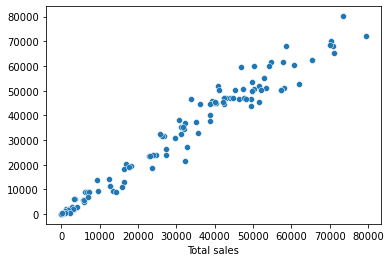

In [68]:
sns.scatterplot(y_test['Total sales'], prediction_2)

### Hyperparameter Tuning

In [69]:
RandomForestRegressor()

RandomForestRegressor()

In [70]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV performs little faster and better compared to GridSearchCV

In [71]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)] #B/W 100 to 1200, selecting 12 Numbers randomly
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [72]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [74]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring= 'neg_mean_squared_error',
                              n_iter= 100, cv= 5, verbose= 2, random_state= 42, n_jobs= 1)
                              

In [76]:
rf_random.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
#Based on the above run, The Best parameters got selected are
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [78]:
rf_random.best_score_

-31987041.538472407

> We can see best score has improved much compared to Decission Tree

In [79]:
predictions = rf_random.predict(X_test)

/home/rdcosta/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


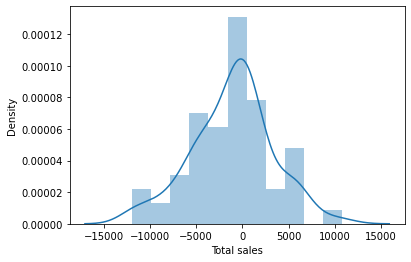

In [80]:
sns.distplot(y_test['Total sales'] - predictions)

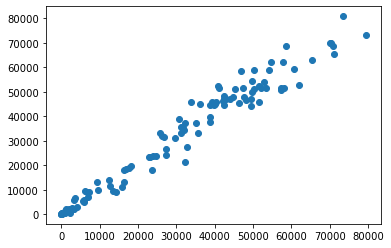

In [81]:
plt.scatter(y_test['Total sales'], predictions)

## Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are loss functions, because we want to minimize them.

In [82]:
from sklearn import metrics

In [83]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  3298.662648252033
MSE:  20034004.097030215
RMSE:  4475.936114047006


* It is observed that the RMSE of Random Forest has significantly reduced compared to Decission Tree